In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as skp
from tensorflow import keras
import librosa, IPython
import librosa.display as lplt

import seaborn as sns
sns.set_style('whitegrid')

### Dataset Inspection

In [15]:
df = pd.read_csv('./data/features_3_sec.csv')
df.sample(15)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
4397,hiphop.00040.5.wav,66149,0.317485,0.106584,0.182338,0.010510,2721.531141,9.623460e+05,3155.626243,263943.137338,...,92.274231,-13.007076,106.372826,1.514260,65.042526,3.347036,160.054962,2.847941,211.093750,hiphop
6975,metal.00098.3.wav,66149,0.527577,0.070534,0.126765,0.003461,2630.441602,2.242990e+05,2235.138948,134124.269061,...,16.940922,-8.948550,16.042566,4.679709,26.403610,-3.232928,32.780273,4.681583,22.607149,metal
4031,hiphop.00003.7.wav,66149,0.430300,0.095982,0.283472,0.013149,2641.527214,3.999306e+05,2414.696848,210592.226192,...,116.414001,1.275617,37.833767,1.501930,46.670479,-5.180931,74.351761,-3.407120,43.858616,hiphop
6646,metal.00065.4.wav,66149,0.446390,0.078419,0.088386,0.000783,2780.821013,1.798852e+05,2259.338093,86878.259649,...,34.086327,-12.204181,57.966667,1.085835,28.138706,-10.364303,28.982483,-2.660292,42.583191,metal
7606,pop.00061.4.wav,66149,0.445061,0.089641,0.214968,0.005401,3022.112753,1.445522e+06,2959.546201,292519.732098,...,56.388222,2.215022,64.451012,-0.396626,40.267082,-2.579279,49.030846,-5.524308,54.022598,pop
9796,rock.00080.6.wav,66149,0.402669,0.075768,0.103155,0.000582,2635.260958,3.338127e+05,2333.137727,65549.677631,...,68.105858,-10.745803,36.134983,4.059835,62.121239,-2.791286,31.187719,4.786403,35.269478,rock
8950,reggae.00095.8.wav,66149,0.401458,0.080870,0.178074,0.005104,2717.214328,5.286321e+05,2830.799710,176725.289212,...,33.468170,-8.489579,21.174948,-2.045999,39.198742,-6.450284,29.988190,-8.655691,30.876112,reggae
5908,jazz.00091.6.wav,66149,0.214355,0.076185,0.037540,0.000373,2884.921387,3.985535e+05,2873.267129,91001.716040,...,77.138000,-14.423872,70.745567,-9.409420,17.478868,-1.520374,37.614674,-12.666581,105.239128,jazz
5503,jazz.00051.1.wav,66149,0.276861,0.098806,0.076495,0.001567,1142.041024,1.229200e+05,1536.176331,51501.935012,...,13.988863,0.033778,32.731754,-3.007650,25.235201,-0.931999,35.872482,-4.785870,94.425049,jazz
8606,reggae.00061.4.wav,66149,0.388714,0.091255,0.184761,0.002858,2745.475925,1.153852e+06,2895.979183,381866.681351,...,52.210514,1.508421,47.556561,0.141601,51.288387,-7.958897,45.557228,-9.669752,50.567459,reggae


In [19]:
df.shape

(9990, 60)

### Data Visualization
Desribe librose

In [3]:
audio_fp = './data/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

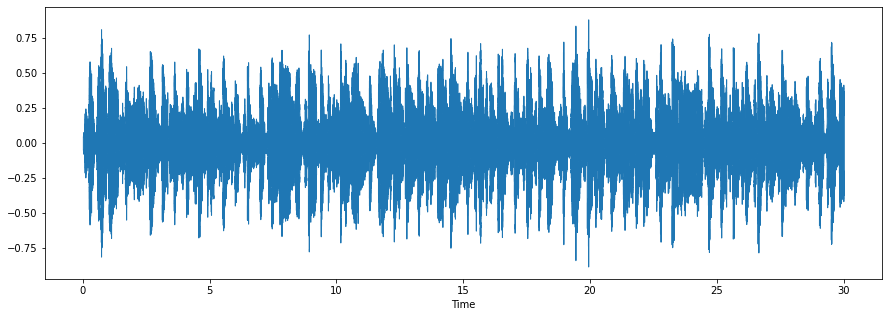

In [5]:
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveshow(audio_data)
plt.show()

#### Spectrogram
Description

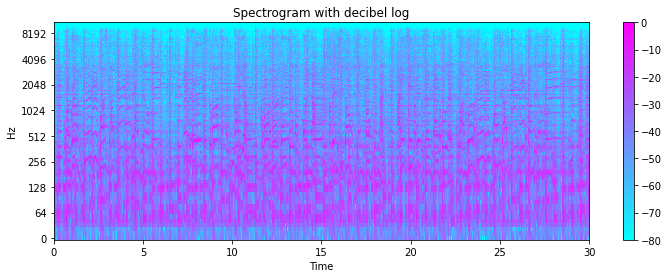

In [7]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

#### Mel Spectrogram
Desc

C:\Users\deniz\AppData\Local\Temp\ipykernel_17140\1730350987.py:1: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)


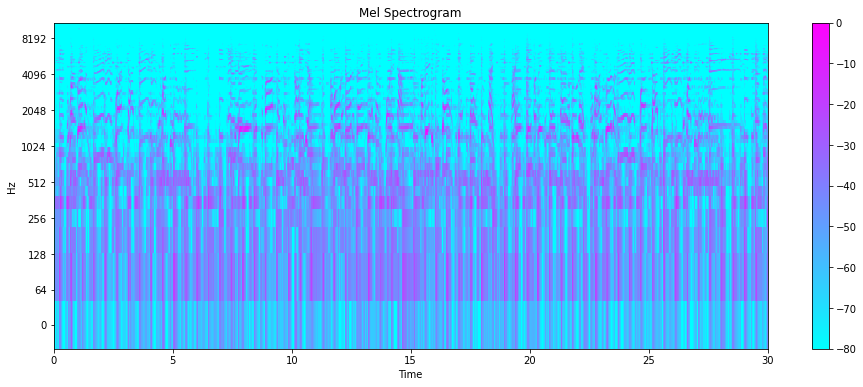

In [8]:
mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

#### Correlation Heatmap
Desc

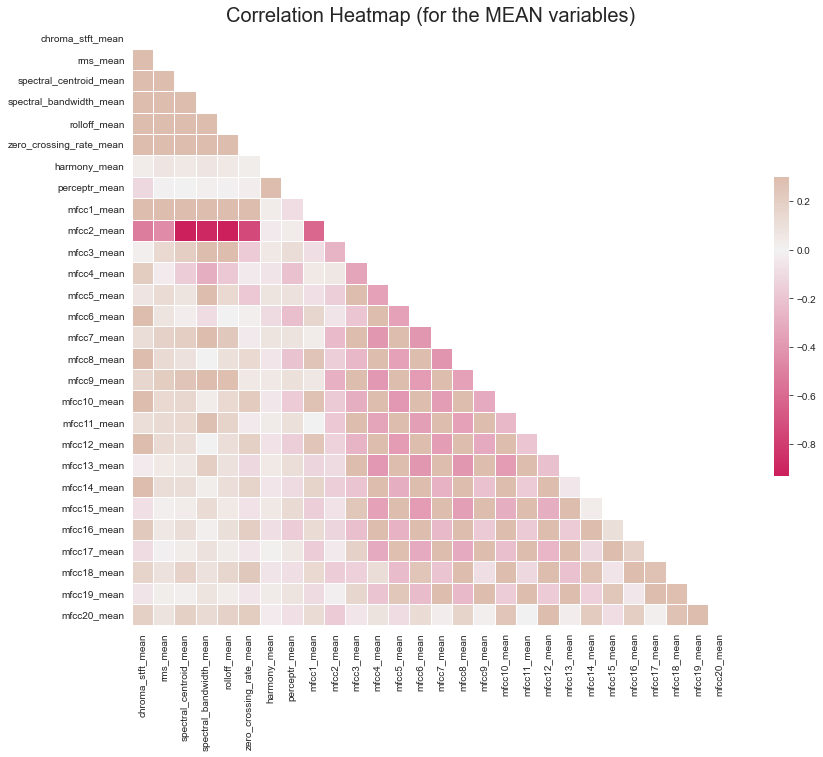

In [17]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

#### PCA on Genres
Desc

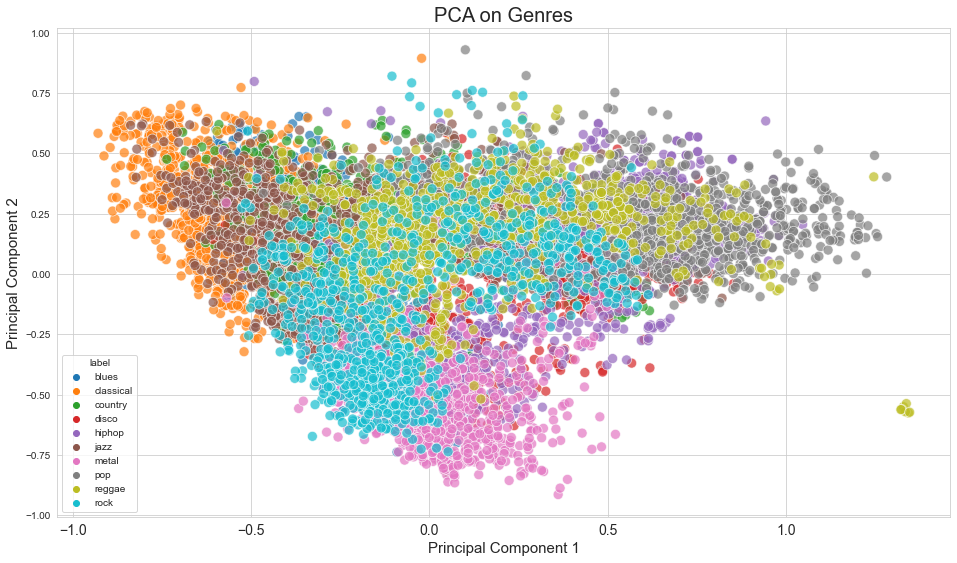

In [19]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

### Feature Extraction
Preprocessing of data is required before we finally train the data. We will try and focus on the last column that is ‘label’ and will encode it with the function `LabelEncoder()` of `sklearn.preprocessing`.

In [20]:
df = df.drop(labels="filename", axis=1)

class_list = df.iloc[:, -1]
converter = LabelEncoder()
y = converter.fit_transform(class_list)

print(y)

[0 0 0 ... 9 9 9]


In [21]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

### Scaling the features
Standard scaler is used to standardize features by removing the mean and scaling to unit variance. The standard score of sample x is calculated as: z = (x - u) / s

In [22]:
from sklearn.preprocessing import StandardScaler

fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

### Dividing Training and Testing Dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
len(y_test)

3297

In [25]:
len(y_train)

6693

### Building the model

For the CNN model, we had used the Adam optimizer for training the model. The epoch that was chosen for the training model is 600. All of the hidden layers are using the RELU activation function and the output layer uses the softmax function. The loss is calculated using the sparse_categorical_crossentropy function. Dropout is used to prevent overfitting. We chose the Adam optimizer because it gave us the best results after evaluating other optimizers. The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.

In [26]:
import tensorflow as tf

In [27]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

#### Epoch 700 - Optimizer sgd
sadsad

In [28]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

print(model1.summary())
model_history1 = trainModel(model=model1, epochs=700, optimizer='sgd')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               30208     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

Validation Accuracy 0.9178040623664856


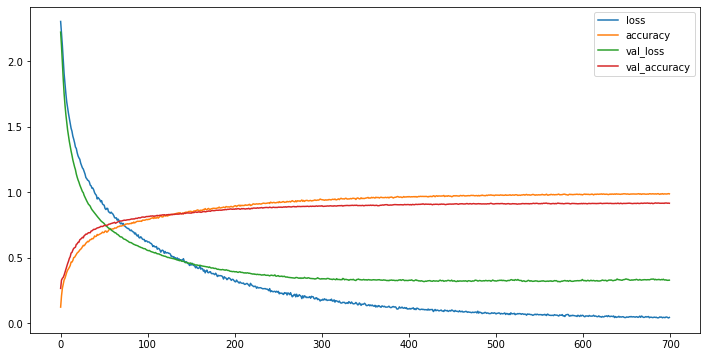

In [29]:
plotValidate(model_history1)

#### Epoch 500 - Optimizer: rmsprop
sadasda

In [30]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

print(model2.summary())
model_history2 = trainModel(model=model2, epochs=500, optimizer='rmsprop')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               30208     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

Validation Accuracy 0.9314528107643127


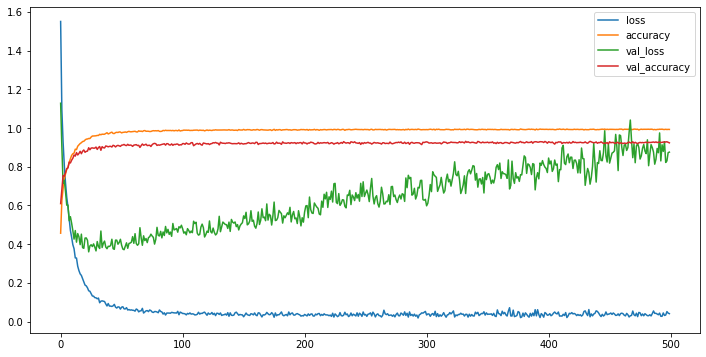

In [31]:
plotValidate(model_history2)

#### Epoch 70 - Optimizer: adam
asdsada

In [32]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

print(model3.summary())
model_history3 = trainModel(model=model3, epochs=70, optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               30208     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)               

Validation Accuracy 0.9181073904037476


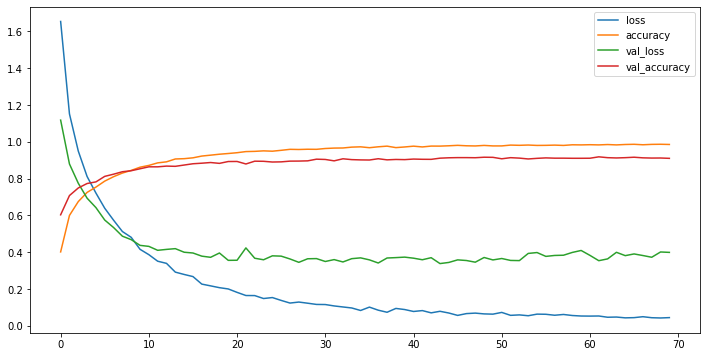

In [33]:
plotValidate(model_history3)

#### Epoch 600 - Optimizer: adam
sadas

In [34]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

print(model4.summary())
model_history4 = trainModel(model=model4, epochs=600, optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               30208     
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

Validation Accuracy 0.9393388032913208


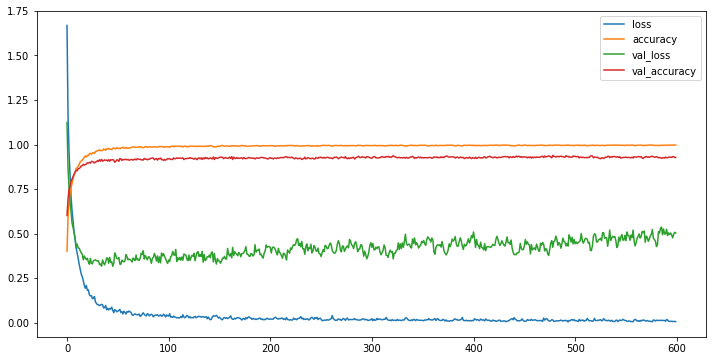

In [35]:
plotValidate(model_history4)

### Conclusion
The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly. The accuracy we achieved for the test set is 93.05 percent which is very decent. So we come to the conclusion that Neural Networks are very effective in machine learning models. Tensorflow is very useful in implementing Convolutional Neural Network (CNN) that helps in the classifying process.